# Example of getting Sentinel2 data

Example gets field information from database, retrieves Sentinel 2 images and calculates vegetation indices for each zone

In [6]:
import sys
sys.path.append("..")
from twinyields.eo import Sentinel2
from twinyields.database import TwinDataBase

### Get field and zones

<AxesSubplot:>

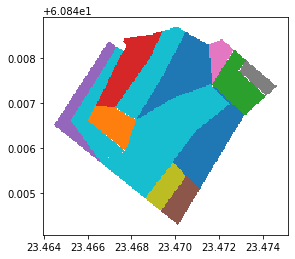

In [15]:
db = TwinDataBase()
field, zones = db.get_field()
zones.plot(column="zone")

### Download and process S2 data

In [11]:
%%time
startdate = "2022-06-15"
enddate = "2022-06-23"
s2 = Sentinel2()
s2.get_data(field.geometry.iloc[0], startdate, enddate)

Searching S2 data from 2022-06-15 to 2022-06-23 for area A
Found 6 available S2 acquisition dates.
Retrieving S2 data...
2 good observations available. Retrieving data...
Retrieving band data for item S2B_34VFN_20220619_0_L2A
Retrieving band data for item S2B_34VFN_20220616_0_L2A
CPU times: total: 20 s
Wall time: 1min 17s


In [16]:
s2.data

<xarray.Dataset>
Dimensions:       (time: 2, band: 10, y: 49, x: 56)
Coordinates:
  * time          (time) datetime64[ns] 2022-06-16T09:50:39 2022-06-19T10:00:29
  * band          (band) <U3 'B2' 'B3' 'B4' 'B5' 'B6' ... 'B8' 'B8A' 'B11' 'B12'
  * y             (y) float64 6.748e+06 6.748e+06 ... 6.748e+06 6.748e+06
  * x             (x) float64 6.339e+05 6.339e+05 ... 6.345e+05 6.345e+05
Data variables:
    band_data     (time, band, y, x) float64 nan nan nan nan ... nan nan nan nan
    SCL           (time, y, x) int16 99 99 99 99 99 99 99 ... 99 99 99 99 99 99
    assetid       (time) object 'S2B_34VFN_20220616_0_L2A' 'S2B_34VFN_2022061...
    productid     (time) object 'S2B_MSIL2A_20220616T095039_N0400_R079_T34VFN...
    sun_azimuth   (time) float64 168.1 171.6
    sun_zenith    (time) float64 37.86 37.59
    view_azimuth  (time) float64 118.0 290.7
    view_zenith   (time) float64 3.951 7.043
    datasource    (time) object 'aws_cog' 'aws_cog'
    lai           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    fapar         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    ndvi          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    name:          A
    crs:           EPSG:32634
    tile_id:       34VFN
    aoi_geometry:  POLYGON ((23.464409 60.846513, 23.466944 60.848405, 23.467...
    aoi_pixels:    1516